# Plotting OER quantities vs all individual descriptors
---


### Import Modules

In [1]:
import os
print(os.getcwd())
import sys
import time; ti = time.time()


import copy

import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
# pd.options.display.max_colwidth = 100

import plotly.graph_objs as go
import plotly.express as px

from methods import get_df_features_targets
from methods import get_df_slab

# #########################################################
from layout import layout

# #########################################################
from local_methods import create_linear_model_plot
from local_methods import isolate_target_col

/mnt/f/Dropbox/01_norskov/00_git_repos/PROJ_IrOx_OER/workflow/oer_vs_features


In [2]:
from methods import isnotebook    
isnotebook_i = isnotebook()
if isnotebook_i:
    from tqdm.notebook import tqdm
    verbose = True
    show_plot = True
else:
    from tqdm import tqdm
    verbose = False
    show_plot = False

### Read Data

In [3]:
df_features_targets = get_df_features_targets()
# df_features_targets = df_features_targets

df_slab = get_df_slab()

In [4]:
# 150
# 181
print(
    "Number of rows in df_features_targets:",
    df_features_targets.shape[0],
    )

Number of rows in df_features_targets: 368


### Dropping phase 1 slabs

In [5]:
# Getting phase > 1 slab ids
df_slab_i = df_slab[df_slab.phase > 1]
phase_2_slab_ids = df_slab_i.slab_id.tolist()

df_index = df_features_targets.index.to_frame()
df_index_i = df_index[
    df_index.slab_id.isin(phase_2_slab_ids)
    ]

print("Dropping phase 1 slabs")
df_features_targets = df_features_targets.loc[
    df_index_i.index
    ]

Dropping phase 1 slabs


### Creating separate `df_data` dataframe

In [6]:
df_data = df_features_targets["data"]
df_data = df_data.droplevel(1)

df_data.iloc[0:2]

active_site compenv      slab_id active_site_orig__o  \
                                                                           
compenv active_site                                                        
nersc   38.0               38.0   nersc  buvivore_13                  38   
        74.0               74.0   nersc  dakoputu_58                  74   

                    active_site_orig__oh ads__o ads__oh att_num__o  \
                                                                     
compenv active_site                                                  
nersc   38.0                        38.0      o      oh          1   
        74.0                        74.0      o      oh          1   

                    att_num__oh found_active_Ir__o found_active_Ir__oh  \
                                                                         
compenv active_site                                                      
nersc   38.0                0.0               True                True   
        74.0                3.0               True                True   

                    from_oh__o from_oh__oh job_id_max__o job_id_max__oh  \
                                                                          
compenv active_site                                                       
nersc   38.0              True        True   fidivuwi_89    nipidida_98   
        74.0              True        True   habamehi_10    buvawasa_30   

                    num_missing_Os__o num_missing_Os__oh orig_slab_good__o  \
                                                                             
compenv active_site                                                          
nersc   38.0                      0.0                0.0              True   
        74.0                      2.0                0.0              True   

                    orig_slab_good__oh used_unrelaxed_df_coord__o  \
                                                                    
compenv active_site                                                 
nersc   38.0                      True                      False   
        74.0                     False                       True   

                    used_unrelaxed_df_coord__oh     job_id_o    job_id_oh  \
                                                                            
compenv active_site                                                         
nersc   38.0                              False  fidivuwi_89  nipidida_98   
        74.0                              False  habamehi_10  buvawasa_30   

                     job_id_bare all_done any_bare_done any_oh_done  \
                                                                      
compenv active_site                                                   
nersc   38.0         halavamu_98     True          True        True   
        74.0         dibomehi_65     True          True        True   

                    any_o_done any_o_w_as_done low_e_not_from_oh__o  \
                                                                      
compenv active_site                                                   
nersc   38.0              True            True                False   
        74.0              True            True                False   

                    low_e_not_from_oh__bare phase stoich  \
                                                           
compenv active_site                                        
nersc   38.0                          False     2    AB2   
        74.0                          False     2    AB2   

                                    name_str sum_norm_abs_magmom_diff  \
                                                                        
compenv active_site                                                     
nersc   38.0         nersc__buvivore_13__038                 0.238260   
        74.0         nersc__dakoputu_58__074                 0.115908   

                    norm_sum_norm_abs_m

### Filter `df_features_targets` down to features and targets columns

In [7]:
# #########################################################
cols_to_keep = []
target_cols = []
# #########################################################
for col_i in df_features_targets.columns:
    # #####################################################
    lev_0 = col_i[0]
    lev_1 = col_i[1]
    lev_2 = col_i[2]
    # #####################################################

    keep_col = False

    if lev_0 == "features":
        keep_col = True
    # if lev_0 == "features" and lev_1 == "o":
    #     keep_col = True

    if lev_0 == "targets":
        target_cols.append(col_i)
        keep_col = True

    if keep_col:
        cols_to_keep.append(col_i)

# #########################################################
df_i = df_features_targets[cols_to_keep]
# #########################################################

df_i.iloc[0:2]

targets                                \
                                      g_o      g_oh       e_o      e_oh   
                                                                          
compenv slab_id     active_site                                           
nersc   buvivore_13 38.0         1.516495  0.145745  1.472495 -0.148755   
        dakoputu_58 74.0         2.743977  1.355680  2.699977  1.061180   

                                                    features            \
                                 g_o_m_oh  e_o_m_oh       oh             
                                                    O_magmom Ir_magmom   
compenv slab_id     active_site                                          
nersc   buvivore_13 38.0         1.370750  1.621250    0.124     0.405   
        dakoputu_58 74.0         1.388297  1.638797    0.010     0.294   

                                                                          \
                                                                           
                                active_o_metal_dist angle_O_Ir_surf_norm   
compenv slab_id     active_site                                            
nersc   buvivore_13 38.0                   1.924408             1.782806   
        dakoputu_58 74.0                   1.902083            85.900628   

                                                                          \
                                                                           
                                closest_Ir_dist closest_O_dist ir_o_mean   
compenv slab_id     active_site                                            
nersc   buvivore_13 38.0               3.633028       3.224902  2.002212   
        dakoputu_58 74.0               3.611606       2.604480  1.940913   

                                                                    \
                                                                     
                                 ir_o_std   octa_vol oxy_opp_as_bl   
compenv slab_id     active_site                                      
nersc   buvivore_13 38.0         0.051808  10.295925      2.027490   
        dakoputu_58 74.0         0.150763   9.397154      2.135911   

                                                                 \
                                                                  
                                degrees_off_of_straight__as_opp   
compenv slab_id     active_site                                   
nersc   buvivore_13 38.0                               9.275869   
        dakoputu_58 74.0                              13.825899   

                                                                       \
                                                          o             
                                as_ir_opp_bl_ratio O_magmom Ir_magmom   
compenv slab_id     active_site                                         
nersc   buvivore_13 38.0                  0.949158    0.696     0.730   
        dakoputu_58 74.0                  0.890525    0.014     0.032   

                                                                \
                                                                 
                                Ir*O_bader  Ir_bader   O_bader   
compenv slab_id     active_site                                  
nersc   buvivore_13 38.0               NaN       NaN       NaN   
        dakoputu_58 74.0         -1.994416  2.873393 -0.694098   

                                                                          \
                                                                           
                                active_o_metal_dist angle_O_Ir_surf_norm   
compenv slab_id     active_site                                            
nersc   buvivore_13 38.0                   1.782397             1.456500   
        dakoputu_58 74.0                   1.750519            92.325157   

                                                                          \
                               

### Plotting everything

In [8]:
df_i["features"]["o"].sort_values("ir_o_mean", ascending=False)

O_magmom  Ir_magmom  Ir*O_bader  Ir_bader  \
compenv  slab_id     active_site                                              
nersc    winomuvi_99 82.0            0.690      0.659   -1.151081  2.135451   
         mututesi_43 77.0            0.712      0.599   -1.201775  2.156609   
sherlock temidule_87 37.0            0.637      0.542   -1.279716  2.134127   
slac     fevahaso_90 28.0            0.247      0.431         NaN       NaN   
nersc    buvivore_13 38.0            0.696      0.730         NaN       NaN   
...                                    ...        ...         ...       ...   
sherlock lenabefe_62 48.0            0.023      0.055   -1.728112  2.775909   
         filetumi_93 65.0            0.000      0.007   -2.197036  3.112593   
         lenabefe_62 53.0            0.015      0.004   -1.654648  2.775877   
slac     rugedebu_48 24.0            0.003      0.001   -1.837633  2.934498   
sherlock bekusuvu_00 56.0            0.142      0.074   -1.625748  2.734846   

                                   O_bader  active_o_metal_dist  \
compenv  slab_id     active_site                                  
nersc    winomuvi_99 82.0        -0.539034             1.791053   
         mututesi_43 77.0        -0.557252             1.793264   
sherlock temidule_87 37.0        -0.599644             1.782376   
slac     fevahaso_90 28.0              NaN             1.760475   
nersc    buvivore_13 38.0              NaN             1.782397   
...                                    ...                  ...   
sherlock lenabefe_62 48.0        -0.622539             1.777957   
         filetumi_93 65.0        -0.705854             1.776287   
         lenabefe_62 53.0        -0.596081             1.779167   
slac     rugedebu_48 24.0        -0.626217             1.764005   
sherlock bekusuvu_00 56.0        -0.594457             1.769386   

                                  angle_O_Ir_surf_norm  closest_Ir_dist  \
compenv  slab_id     active_site                                          
nersc    winomuvi_99 82.0                    23.523718         3.500500   
         mututesi_43 77.0                    15.456033         3.504828   
sherlock temidule_87 37.0                    18.872278         3.645834   
slac     fevahaso_90 28.0                    62.665895         3.487834   
nersc    buvivore_13 38.0                     1.456500         3.686693   
...                                                ...              ...   
sherlock lenabefe_62 48.0                    77.027138         3.298277   
         filetumi_93 65.0                    95.740954         3.475990   
         lenabefe_62 53.0                    29.377464         3.286797   
slac     rugedebu_48 24.0                    62.590364         3.322586   
sherlock bekusuvu_00 56.0                    18.839212         3.564895   

                                  closest_O_dist  ir_o_mean  ir_o_std  \
compenv  slab_id     active_site                                        
nersc    winomuvi_99 82.0               2.655275   2.008908  0.109966   
         mututesi_43 77.0               2.645110   2.005893  0.106197   
sherlock temidule_87 37.0               3.180891   2.001763  0.101344   
slac     fevahaso_90 28.0               3.027516   2.001040  0.249138   
nersc    buvivore_13 38.0               3.267705   1.999222  0.104375   
...                                          ...        ...       ...   
sherlock lenabefe_62 48.0               2.701120   1.899826  0.092529   
         filetumi_93 65.0               2.828308   1.899579  0.162072   
         lenabefe_62 53.0               2.484685   1.899506  0.093337   
slac     rugedebu_48 24.0               2.644590   1.898213  0.134539   
sherlock bekusuvu_00 56.0               2.426362   1.898017  0.072167   

                                   octa_vol  p_band_center  oxy_opp_as_bl  \
compenv  slab_id     active_site                                            
nersc    winomuvi_99 82.0         10.630199      -2.60

### Preparing format dataframe

In [9]:
data_dict_list = []
# for index_i, row_i in df_i_2.iterrows():
for index_i, row_i in df_i.iterrows():
    # #####################################################
    data_dict_i = dict()
    # #####################################################
    index_dict_i = dict(zip(df_i.index.names, index_i))
    # #####################################################

    # #####################################################
    row_data_i = df_features_targets.data.loc[index_i]
    # #####################################################
    stoich_i = row_data_i["stoich"][""]
    # #####################################################

    if stoich_i == "AB2":
        color_i = "orange"
    elif stoich_i == "AB3":
        color_i = "green"
    # #####################################################
    data_dict_i.update(index_dict_i)
    # #####################################################
    # data_dict_i["color"] = color_i
    data_dict_i["stoich"] = stoich_i
    # #####################################################
    data_dict_list.append(data_dict_i)
    # #####################################################

# #########################################################
df_format = pd.DataFrame(data_dict_list)
df_format = df_format.set_index(["compenv", "slab_id", "active_site", ])
# #########################################################

In [10]:
df_i.features

oh                                \
                                O_magmom Ir_magmom active_o_metal_dist   
compenv slab_id     active_site                                          
nersc   buvivore_13 38.0           0.124     0.405            1.924408   
        dakoputu_58 74.0           0.010     0.294            1.902083   
                    75.0           0.006     0.428            1.899401   
                    76.0           0.012     0.503            1.927104   
                    77.0           0.014     0.082            1.936845   
...                                  ...       ...                 ...   
slac    wonataro_02 64.0           0.003     0.049            1.928650   
        wowukoli_59 27.0           0.019     0.066            1.935593   
        wufulafe_03 56.0           0.078     0.095            1.916197   
                    57.0           0.019     0.041            1.938808   
                    58.0           0.027     0.001            1.929257   

                                                                      \
                                angle_O_Ir_surf_norm closest_Ir_dist   
compenv slab_id     active_site                                        
nersc   buvivore_13 38.0                    1.782806        3.633028   
        dakoputu_58 74.0                   85.900628        3.611606   
                    75.0                   83.096801        3.436343   
                    76.0                   60.545047        3.487364   
                    77.0                   43.906615        3.622015   
...                                              ...             ...   
slac    wonataro_02 64.0                   66.183779        3.679039   
        wowukoli_59 27.0                   56.411728        3.641954   
        wufulafe_03 56.0                   16.396962        3.603952   
                    57.0                   31.792455        3.563218   
                    58.0                   17.238952        3.612560   

                                                                               \
                                closest_O_dist ir_o_mean  ir_o_std   octa_vol   
compenv slab_id     active_site                                                 
nersc   buvivore_13 38.0              3.224902  2.002212  0.051808  10.295925   
        dakoputu_58 74.0              2.604480  1.940913  0.150763   9.397154   
                    75.0              2.705932  1.979701  0.122135   9.928546   
                    76.0              2.987158  1.954253  0.166545   9.647097   
                    77.0              2.663475  1.942756  0.151443   9.367321   
...                                        ...       ...       ...        ...   
slac    wonataro_02 64.0              3.076929  1.926832  0.101255   9.105478   
        wowukoli_59 27.0              2.890194  1.978550  0.162758  10.188347   
        wufulafe_03 56.0              2.778521  1.985642  0.040405  10.171034   
                    57.0              2.759678  1.947774  0.058912   9.723260   
                    58.0              3.418859  1.968887  0.059495   9.983895   

                                                                               \
                                oxy_opp_as_bl degrees_off_of_straight__as_opp   
compenv slab_id     active_site                                                 
nersc   buvivore_13 38.0             2.027490                        9.275869   
        dakoputu_58 74.0             2.135911                       13.825899   
                    75.0             2.034289                       19.243276   
                    76.0             1.928698                       22.135452   
                    77.0             2.049189                        6.602723   
...                                       ...                             ...   
slac    wonataro_02 64.0             1.917148                       18.214122   
        wowukoli_59 27.0             2.099253  

In [11]:
from proj_data import adsorbates


In [12]:
feature_ads_i = "o"
# for col_i in df_i["features"][feature_ads_i].columns:
# for col_i in df_i.features.columns:

cols_to_plot = []
for col_i in df_i.columns:
    if col_i[0] == "features":
        if col_i[1] not in adsorbates:
            cols_to_plot.append(col_i)
        if col_i[1] == feature_ads_i:
            cols_to_plot.append(col_i)


# df_i
# np.sort(
# )

In [13]:
# cols_to_plot

In [14]:
cols_to_plot_0 = []
cols_to_plot_1 = []
for col_i in cols_to_plot:
    if col_i[1] in adsorbates:
        cols_to_plot_0.append(col_i)
    else:
        cols_to_plot_1.append(col_i)

cols_to_plot = cols_to_plot_0 + cols_to_plot_1

In [15]:
# assert False

O_magmom


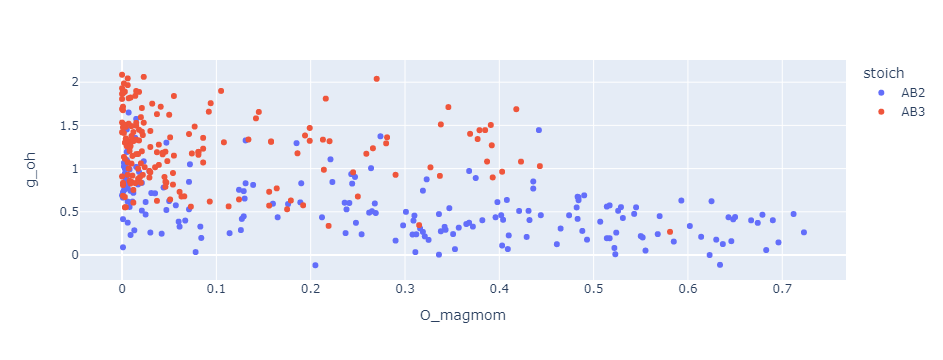

Ir_magmom


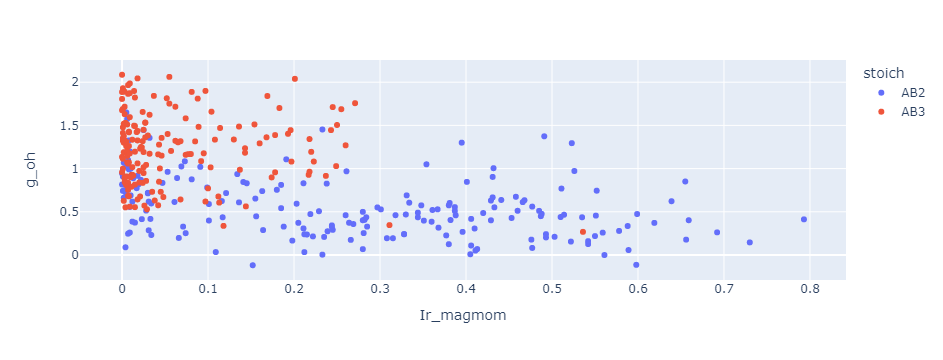

Ir*O_bader


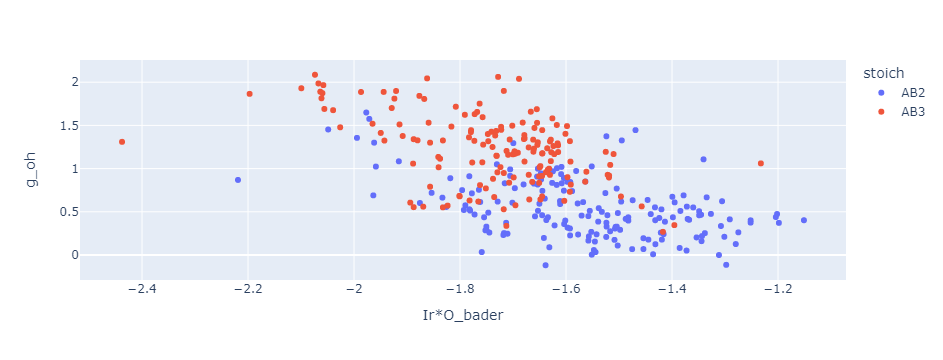

Ir_bader


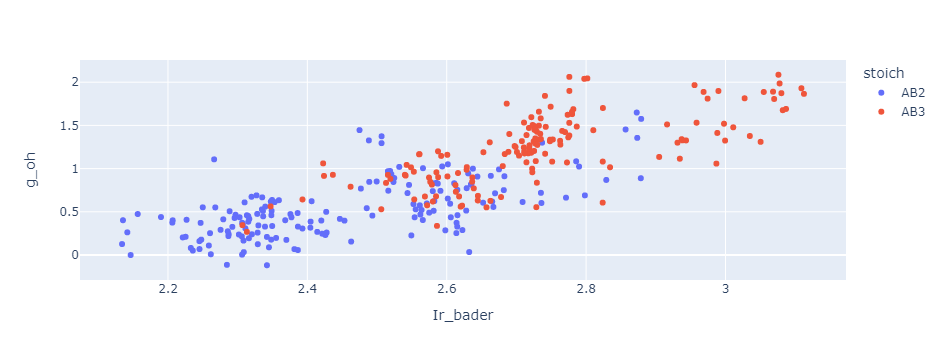

O_bader


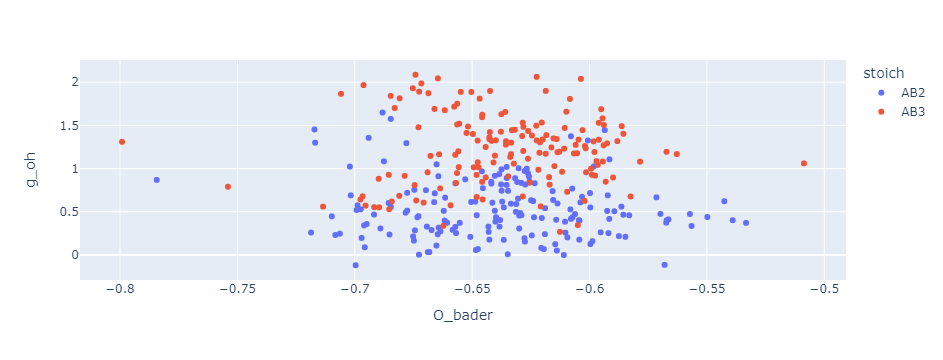

active_o_metal_dist


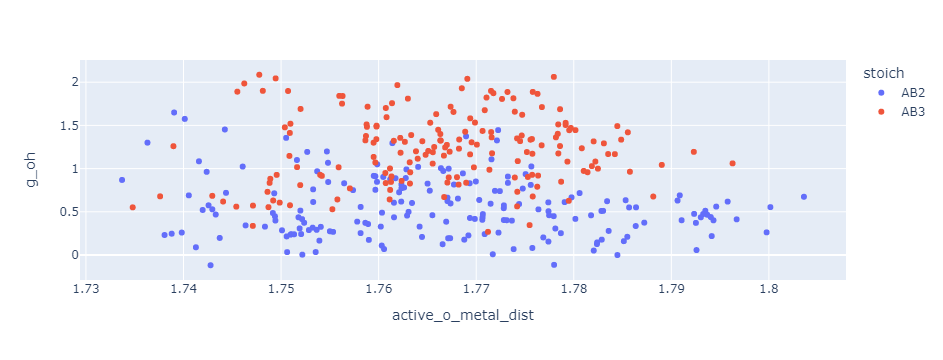

angle_O_Ir_surf_norm


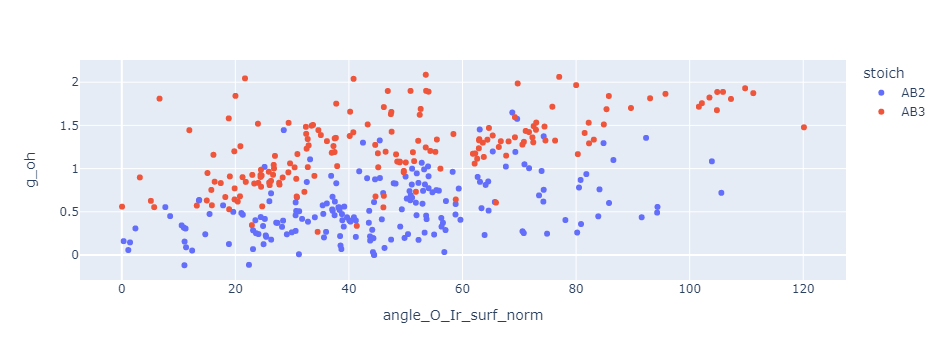

closest_Ir_dist


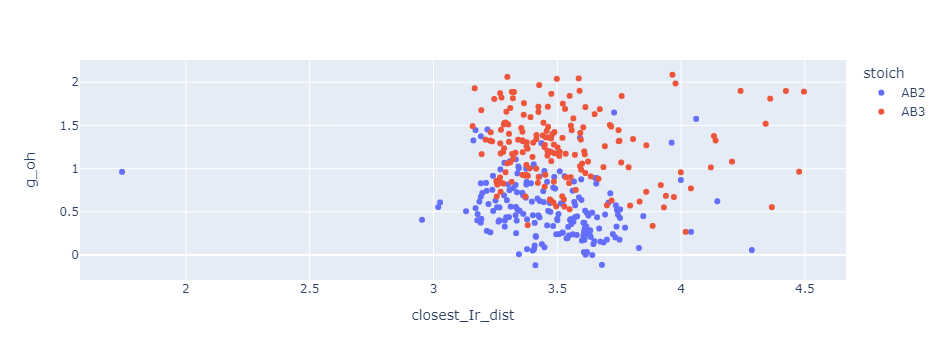

closest_O_dist


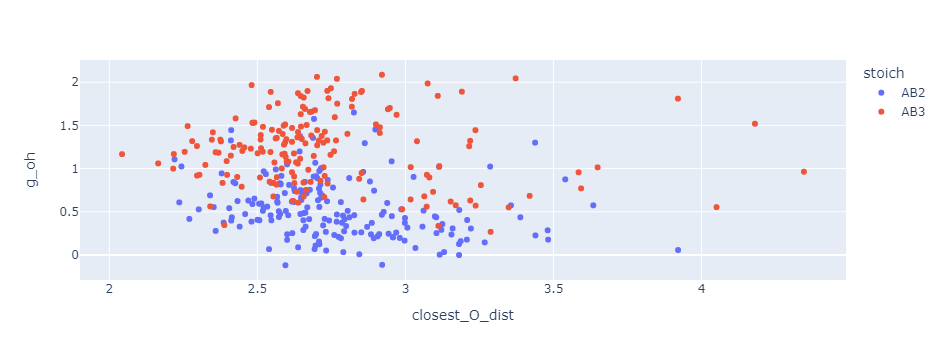

ir_o_mean


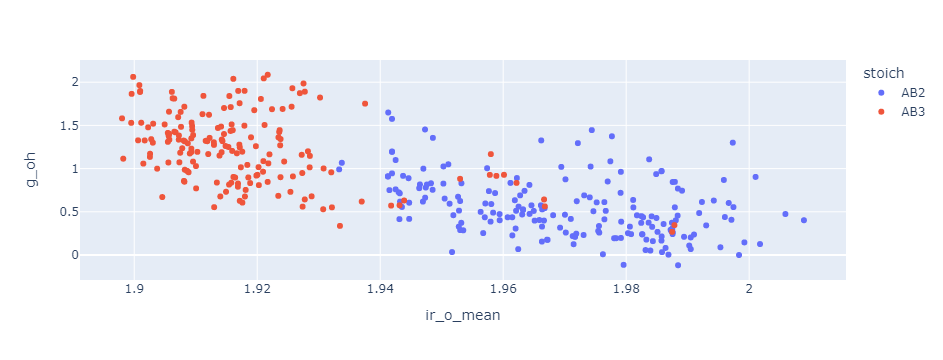

ir_o_std


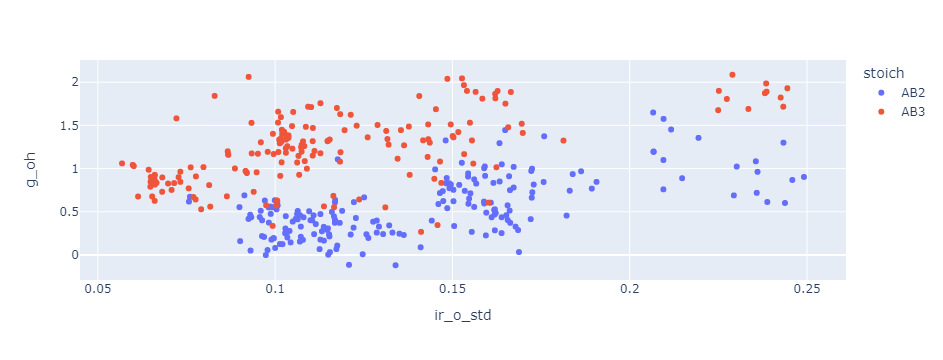

octa_vol


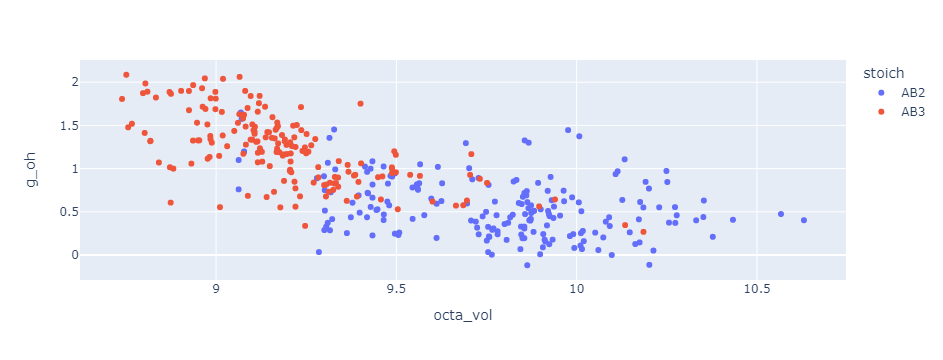

p_band_center


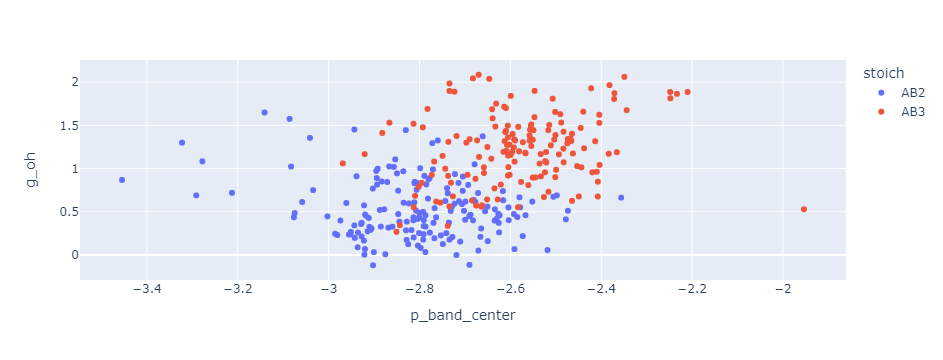

oxy_opp_as_bl


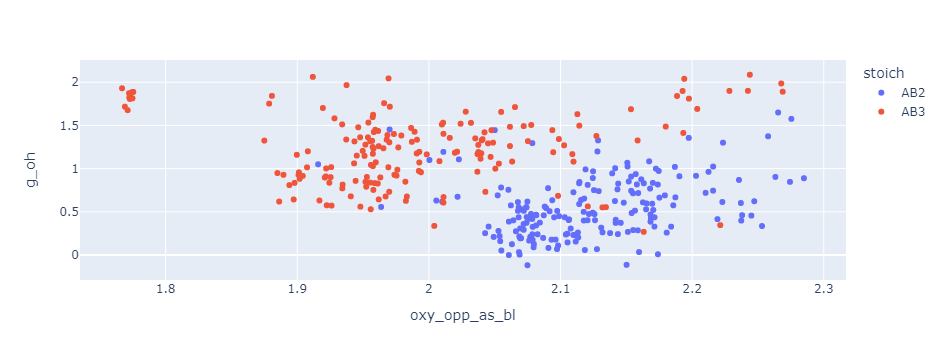

degrees_off_of_straight__as_opp


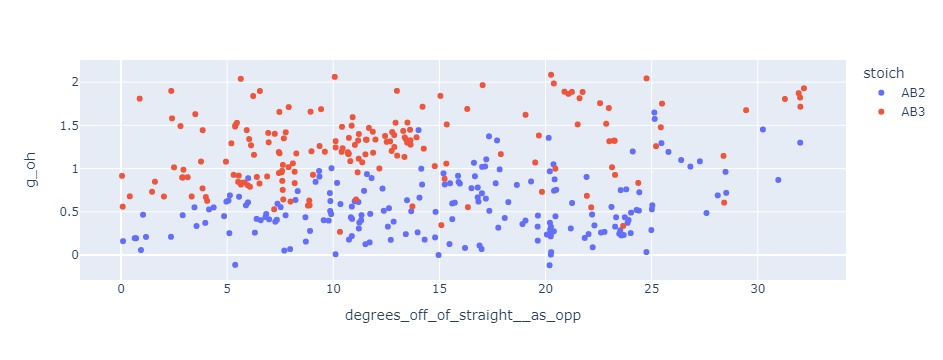

as_ir_opp_bl_ratio


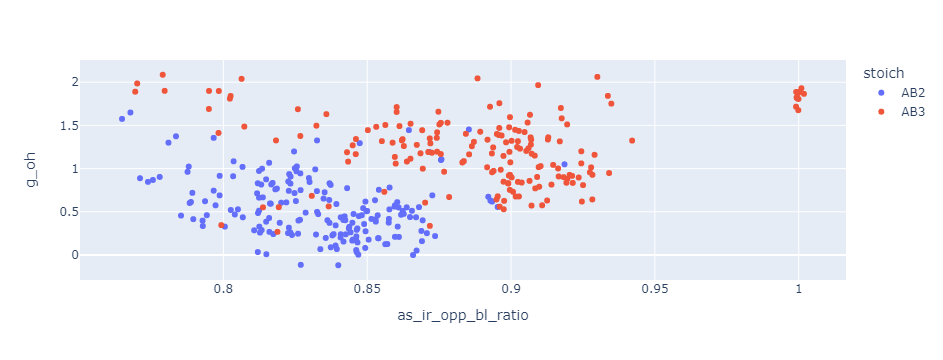

Ir*O_bader/ir_o_mean


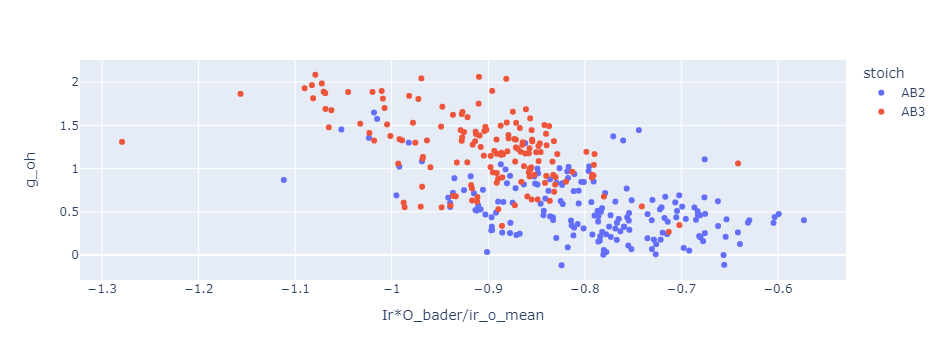

dH_bulk


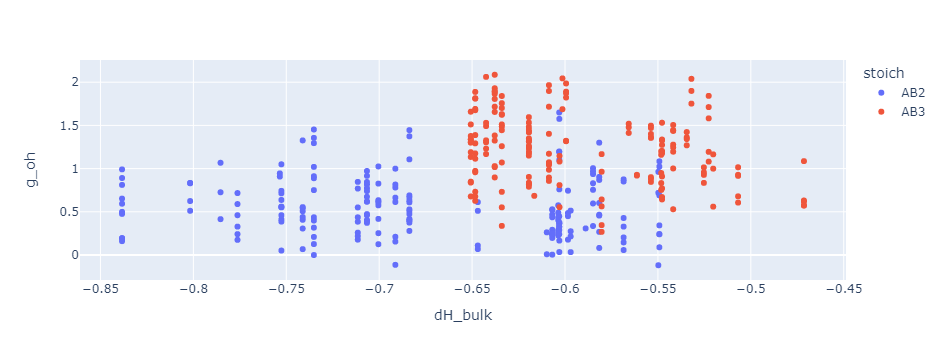

volume_pa


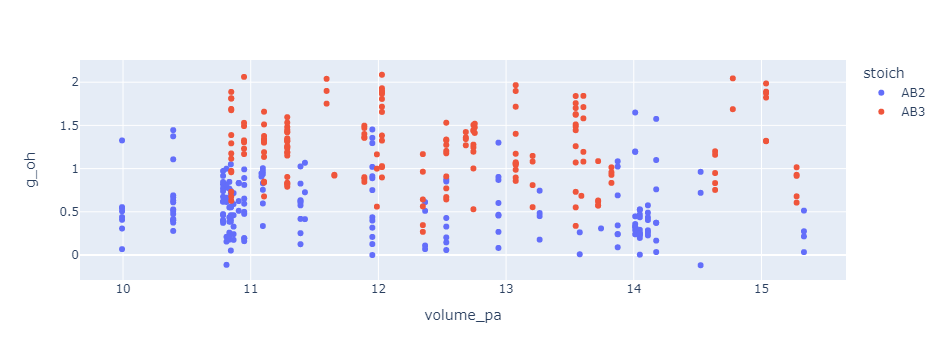

bulk_oxid_state


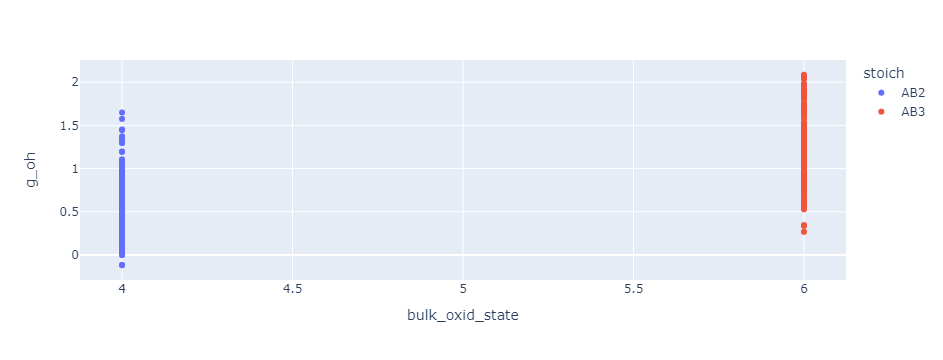

effective_ox_state


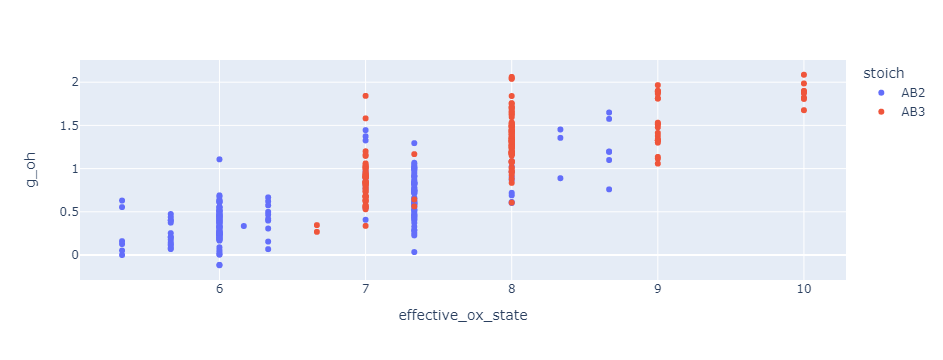

surf_area


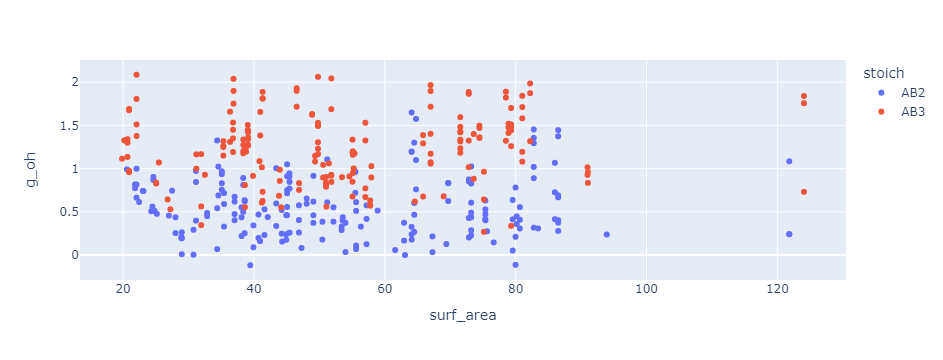

In [16]:
feature_ads_i = "o"
# for col_i in df_i["features"][feature_ads_i].columns:
for col_i in cols_to_plot:

    # col_tup_i = ("features", feature_ads_i, col_i)
    col_tup_i = col_i
    # print(col_tup_i)

    if col_tup_i[1] in adsorbates:
        col_i = col_tup_i[2]
    else:
        col_i = col_tup_i[1]
    
    print(col_i)

    filter_cols = target_cols + [col_tup_i, ]
    df_i_1 = df_i[filter_cols]

    # for target_ads_j in ["o", "oh", ]:
    for target_ads_j in ["oh", ]:
        target_j = "g_" + target_ads_j

        filter_cols = [
            ("targets", target_j, "", ),
            col_tup_i,
            ]




        df_i_2 = df_i_1[filter_cols]
        df_i_2 = df_i_2.dropna()

        # #################################################
        # Modifying the columns in preparation of flattening column levels
        new_cols = []
        for col_j in df_i_2.columns:
            if target_j in list(col_j):
                new_col_j = len(col_j) * (target_j, )
                new_cols.append(new_col_j)
            elif col_j[-1] == "":
                new_col_j = len(col_j) * (col_j[1], )
                new_cols.append(new_col_j)
            else:
                new_cols.append(col_j)
        idx = pd.MultiIndex.from_tuples(new_cols)
        df_i_2.columns = idx

        # Drop top 2 levels, leaving behind normal column index
        df_i_2.columns = df_i_2.columns.droplevel()
        df_i_2.columns = df_i_2.columns.droplevel()

        df_i_2 = pd.concat([df_i_2, df_format], axis=1)







        # #################################################
        # Plotting
        # x_array = df_i_2[col_i[-1]]
        x_array = df_i_2[col_i]
        y_array = df_i_2[target_j]

        fig = px.scatter(df_i_2,
            x=col_i,
            y=target_j,
            # color=df_i_2["color"],
            color=df_i_2["stoich"],
            )

        if show_plot:
            fig.show()

In [17]:
# #########################################################
print(20 * "# # ")
print("All done!")
print("Run time:", np.round((time.time() - ti) / 60, 3), "min")
print("new_oer_vs_features.ipynb")
print(20 * "# # ")
# #########################################################

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
All done!
Run time: 0.155 min
new_oer_vs_features.ipynb
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
